# Bubble raft

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from psm.segments import Segments
from psm.build import lattice_segment
from psm import plotutils
from tqdm import tqdm_notebook as tqdm

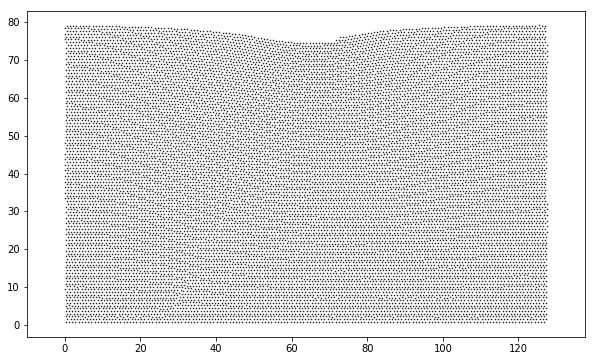

In [2]:
points = np.load('data/bubbleraft_0003.npy')

fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(points[:,0], points[:,1], 'k.', markersize=1)
ax.axis('equal');


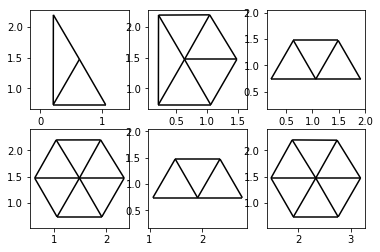

In [4]:
segments = Segments(points)
segments.build_graph(.05)
segments.traversals(max_depth=2)

segments.show(6, nrows=2);

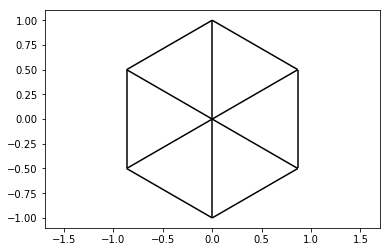

In [5]:
a = [0, 1]
b = [np.sin(2/3*np.pi), np.cos(2/3*np.pi)]

templates = lattice_segment(a, b, min_alpha=.05, max_depth=2)
templates.show();

In [6]:
rmsd = segments.register(templates, transform='similarity', pivot='front', progress_bar=True)

 [||||||||||||||||||||] 16200/16200 registrations


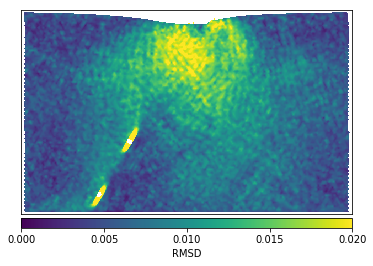

In [7]:
_, best_rmsd = segments.best_matches()

interpolated, extent = plotutils.interpolate(segments.fronts, best_rmsd, 600, 400)

fig,ax=plt.subplots()

ax.imshow(interpolated.T, vmin=0, vmax=.02, extent=extent)

plotutils.add_colorbar(ax, label='RMSD', cmap='viridis', vmin=0, vmax=.02)

ax.set_xticks([]); ax.set_yticks([]);

In [8]:
strain, rotation = segments.calc_strain(adjust_zero='median', rmsd_max=.1)

planar = np.trace(strain, axis1=1, axis2=2) / 2

rotation[np.isnan(rotation) == 0] =  rotation[np.isnan(rotation) == 0] % (np.pi/3)

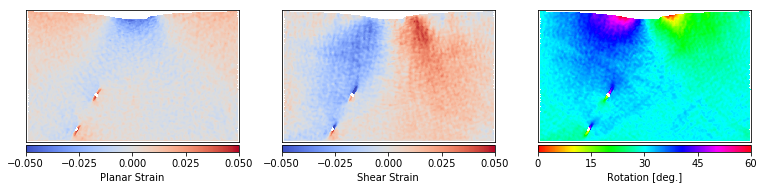

In [9]:
fig,axes = plt.subplots(1, 3, figsize=(13,6))

interpolated, extent = plotutils.interpolate(segments.fronts, planar, 600, 400)
axes[0].imshow(interpolated.T, vmin=-.05, vmax=.05, cmap='coolwarm', extent=extent)
plotutils.add_colorbar(axes[0], label='Planar Strain', cmap='coolwarm', vmin=-.05, vmax=.05)

interpolated, extent = plotutils.interpolate(segments.fronts, strain[:,0,1], 600, 400)
axes[1].imshow(interpolated.T, vmin=-.05, vmax=.05, cmap='coolwarm', extent=extent)
plotutils.add_colorbar(axes[1], label='Shear Strain', cmap='coolwarm', vmin=-.05, vmax=.05)

interpolated, extent = plotutils.interpolate(segments.fronts, rotation, 600, 400)
axes[2].imshow(interpolated.T * 180 / np.pi, cmap='hsv', extent=extent)
plotutils.add_colorbar(axes[2], label='Rotation [deg.]', cmap='hsv', vmin=0, vmax=60, position='bottom')

for ax in axes:
    ax.axis('equal'); ax.set_xticks([]); ax.set_yticks([])